# Poker Hand Data Set 

#### Data Set Information:

Each record is an example of a hand consisting of five playing cards drawn from a standard deck of 52. Each card is described using two attributes (suit and rank), for a total of 10 predictive attributes. There is one Class attribute that describes the "Poker Hand". The order of cards is important, which is why there are 480 possible Royal Flush hands as compared to 4 (one for each suit - explained in [<a href="https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand.names">Web Link</a>]).

#### Attribute Information:

1) S1 "Suit of card #1" 
Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs} 

2) C1 "Rank of card #1" 
Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King) 

3) S2 "Suit of card #2" 
Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs} 

4) C2 "Rank of card #2" 
Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King) 

5) S3 "Suit of card #3" 
Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs} 

6) C3 "Rank of card #3" 
Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King) 

7) S4 "Suit of card #4" 
Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs} 

8) C4 "Rank of card #4" 
Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King) 

9) S5 "Suit of card #5" 
Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs} 

10) C5 "Rank of card 5" 
Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King) 

11) CLASS "Poker Hand" 
Ordinal (0-9)
    - 0: Nothing in hand; not a recognized poker hand
    - 1: One pair; one pair of equal ranks within five cards
    - 2: Two pairs; two pairs of equal ranks within five cards
    - 3: Three of a kind; three equal ranks within five cards
    - 4: Straight; five cards, sequentially ranked with no gaps 
    - 5: Flush; five cards with the same suit 
    - 6: Full house; pair + different rank three of a kind 
    - 7: Four of a kind; four equal ranks within five cards 
    - 8: Straight flush; straight + flush 
    - 9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush

# Contents Navigation
<ul>
    <li><a href="#Data-Load">Data Load</a></li>
    <li><a href="#Data-Preprocessing">Data Preprocessing</a></li>
    <li><a href="#Linear-Models">LinearModels</a></li>
    <li><a href="#KNN">KNN</a></li>
    <li><a href="#Random-Forest">Random Forest</a></li>
    <li><a href="#Neural-Network">Neural Network</a></li>
    <li><a href="#Summary">Summary</a></li>
</ul>

In [1]:
import pandas as pd

## Data Load

In [2]:
column_names = ['S1','C1','S2','C2','S3','C3','S4', 'C4', 'S5', 'C5', 'class',]
# try to load data from local path
# if error occurred then trying to load data from UCI repo
try:
    train = pd.read_csv('data/poker-hand-training-true1.data', names=column_names)
    test = pd.read_csv('data/poker-hand-testing.data', names=column_names)
except IOError:
    import urllib
    
    trainurl = "https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data"
    testurl = "https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-testing.data"

    raw_train = urllib.urlopen(trainurl)
    raw_test = urllib.urlopen(testurl)

    train = pd.read_csv(raw_train, names=column_names)
    test = pd.read_csv(raw_test, names=column_names)

In [3]:
train.shape, test.shape

((25010, 11), (1000000, 11))

In [4]:
X_train, y_train = train.ix[:,:10], train.ix[:,10]
X_test, y_test = test.ix[:,:10], test.ix[:,10]

## Data Preprocessing

It is obvious that suit and rank of cards is categorical data, so it is useful to make some preprocessing steps before go further. To preprocess such data we transform it with one-hot encoding.

In [5]:
from sklearn import preprocessing
from keras.utils import np_utils

Using Theano backend.


In [6]:
# for preprocessing arrays with 2 and more dims using sklearn preprocessing module
encoder = preprocessing.OneHotEncoder(sparse = False)
X_train_encoded = encoder.fit_transform(X_train.values)
X_test_encoded = encoder.fit_transform(X_test.values)

X_train_encoded.shape, X_test_encoded.shape

((25010, 85), (1000000, 85))

In [7]:
# for preprocessing arrays with 1 dim using keras np_utils module
y_train_encoded = np_utils.to_categorical(y_train)
y_test_encoded = np_utils.to_categorical(y_test)

y_train_encoded.shape, y_test_encoded.shape

((25010, 10), (1000000, 10))

We try to apply some linear models, KNN, Random Forest and fully-connected Neural Network with raw data and encoded data, then we compare all of this models by its performance.

## Linear Models

In [8]:
from sklearn import linear_model, grid_search, cross_validation

In [9]:
cv = cross_validation.StratifiedShuffleSplit(y_train, n_iter=5, test_size=0.2, random_state=0)

parameters = {'loss':['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
              'penalty':['l2', 'l1', 'elasticnet']}

sgd = linear_model.SGDClassifier()

### with raw data

In [10]:
grid = grid_search.GridSearchCV(sgd, parameters, scoring='accuracy', cv=cv).fit(X_train, y_train)

In [12]:
print 'Best training score: {}'.format(grid.best_score_)
print 'Best linear model params: {}'.format(grid.best_params_)

linear_score = grid.score(X_test, y_test)
print 'Accuracy score on test data: {}'.format(linear_score)

Best training score: 0.460363781731
Best linear model params: {'penalty': 'l1', 'loss': 'perceptron'}
Accuracy score on test data: 0.444597


### with encoded data

In [13]:
grid2 = grid_search.GridSearchCV(sgd, parameters, scoring='accuracy', cv=cv).fit(X_train_encoded, y_train)

In [14]:
print 'Best training score: {}'.format(grid2.best_score_)
print 'Best linear model params: {}'.format(grid2.best_params_)

linear_score2 = grid2.score(X_test_encoded, y_test)
print 'Accuracy score on test data: {}'.format(linear_score2)

Best training score: 0.482990205876
Best linear model params: {'penalty': 'l1', 'loss': 'log'}
Accuracy score on test data: 0.493275


## KNN

In [15]:
from sklearn import neighbors

### with raw data

In [16]:
knn = neighbors.KNeighborsClassifier(n_neighbors=4, weights='distance', 
                                      algorithm='brute').fit(X_train, y_train)

In [17]:
# to avoid MemoryError issue let's evaluate the model only on 30000 instances 
# we do this by batches
i , batch_size= 0, 2000
scores = []
while i < len(X_test[0:30000]):
    start = i
    end = i + batch_size
    score = knn.score(X_test[start:end], y_test[start:end])
    scores.append(score)
    i += batch_size

In [18]:
knn_score = sum(scores) / float(len(scores))
print 'Accuracy score on test data: {}'.format(knn_score)

Accuracy score on test data: 0.547333333333


### with encoded data

In [19]:
knn2 = neighbors.KNeighborsClassifier(n_neighbors=4, weights='distance', 
                                      algorithm='brute').fit(X_train_encoded, y_train)

In [20]:
i , batch_size= 0, 2000
scores2 = []
while i < len(X_test[0:30000]):
    start = i
    end = i + batch_size
    score = knn2.score(X_test_encoded[start:end], y_test[start:end])
    scores2.append(score)
    i += batch_size

In [21]:
knn_score2 = sum(scores2) / float(len(scores2))
print 'Accuracy score on test data: {}'.format(knn_score2)

Accuracy score on test data: 0.537833333333


## Random Forest

In [22]:
from sklearn import ensemble

### with raw data

In [23]:
tree = ensemble.RandomForestClassifier(n_estimators=100, criterion='gini',
                                       max_depth=10).fit(X_train, y_train)

In [24]:
# to avoid MemoryError issue let's evaluate the model only on 50000 instances 
tree_score = tree.score(X_test[0:50000], y_test[0:50000])
print 'Accuracy score on test data: {}'.format(tree_score)

Accuracy score on test data: 0.60816


### with encoded data

In [25]:
tree2 = ensemble.RandomForestClassifier(n_estimators=100, criterion='gini',
                                        max_depth=10).fit(X_train_encoded, y_train)

In [26]:
tree_score2 = tree2.score(X_test_encoded[0:50000], y_test[0:50000])
print 'Accuracy score on test data: {}'.format(tree_score2)

Accuracy score on test data: 0.55844


## Neural Network

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [28]:
# to avoid AttributeError: 'module' object has no attribute 'control_flow_ops'
# https://github.com/fchollet/keras/issues/3857#issuecomment-255156966
import tensorflow
from tensorflow.python.ops import control_flow_ops
tensorflow.python.control_flow_ops = control_flow_ops

In [29]:
batch_size = 100
epochs = 150

### with raw data

In [30]:
# we apply diamond shape of network based on arguments contained 
# in unit 4.4. of this paper https://arxiv.org/pdf/1601.02376.pdf
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
history = model.fit(X_train.values, y_train_encoded, nb_epoch=epochs, batch_size=batch_size, verbose=1)

Epoch 1/150
25010/25010 [==============================] - 0s - loss: 1.3303 - acc: 0.4314     
Epoch 2/150
25010/25010 [==============================] - 0s - loss: 1.0512 - acc: 0.4799     
Epoch 3/150
25010/25010 [==============================] - 0s - loss: 1.0226 - acc: 0.4898     
Epoch 4/150
25010/25010 [==============================] - 0s - loss: 1.0112 - acc: 0.4964     
Epoch 5/150
25010/25010 [==============================] - 0s - loss: 1.0045 - acc: 0.4956     
Epoch 6/150
25010/25010 [==============================] - 0s - loss: 0.9993 - acc: 0.4983     
Epoch 7/150
25010/25010 [==============================] - 0s - loss: 0.9948 - acc: 0.5014     
Epoch 8/150
25010/25010 [==============================] - 0s - loss: 0.9939 - acc: 0.5004     
Epoch 9/150
25010/25010 [==============================] - 0s - loss: 0.9908 - acc: 0.4987     
Epoch 10/150
25010/25010 [==============================] - 0s - loss: 0.9888 - acc: 0.5036     
Epoch 11/150
25010/25010 [=============

In [32]:
loss, accuracy = model.evaluate(X_test.values, y_test_encoded, batch_size=batch_size)
print("Loss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

 999900/1000000 [============================>.] - ETA: 0sLoss: 0.88, Accuracy: 59.97%


### with encoded data

In [33]:
model2 = Sequential()
model2.add(Dense(85*2, activation='relu', input_dim=X_train_encoded.shape[1]))
model2.add(Dropout(0.2))
model2.add(Dense(85*4, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(85*2, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10,activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
history2 = model2.fit(X_train_encoded, y_train_encoded, nb_epoch=epochs, batch_size=batch_size, verbose=1)

Epoch 1/150
25010/25010 [==============================] - 3s - loss: 1.0414 - acc: 0.4729     
Epoch 2/150
25010/25010 [==============================] - 3s - loss: 0.9890 - acc: 0.4946     
Epoch 3/150
25010/25010 [==============================] - 3s - loss: 0.9583 - acc: 0.5299     
Epoch 4/150
25010/25010 [==============================] - 3s - loss: 0.8363 - acc: 0.6285     
Epoch 5/150
25010/25010 [==============================] - 3s - loss: 0.6730 - acc: 0.7261     
Epoch 6/150
25010/25010 [==============================] - 3s - loss: 0.5515 - acc: 0.7908     
Epoch 7/150
25010/25010 [==============================] - 3s - loss: 0.4592 - acc: 0.8349     
Epoch 8/150
25010/25010 [==============================] - 3s - loss: 0.3841 - acc: 0.8660     
Epoch 9/150
25010/25010 [==============================] - 3s - loss: 0.3511 - acc: 0.8824     
Epoch 10/150
25010/25010 [==============================] - 3s - loss: 0.3233 - acc: 0.8904     
Epoch 11/150
25010/25010 [=============

In [36]:
loss2, accuracy2 = model2.evaluate(X_test_encoded, y_test_encoded, batch_size=batch_size)
print("Loss: %.2f, Accuracy: %.2f%%" % (loss2, accuracy2*100))

1000000/1000000 [==============================] - 55s    
Loss: 0.08, Accuracy: 99.20%


### visualizing learning/loss curve

In [37]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

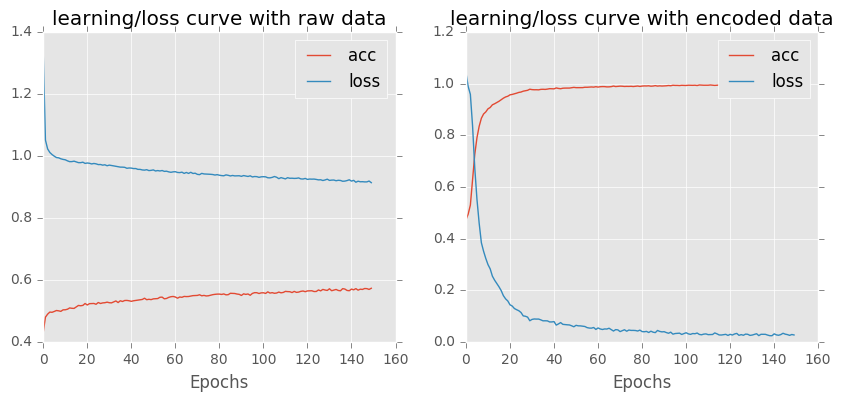

In [38]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.xlabel('Epochs')
plt.title('learning/loss curve with raw data')

plt.subplot(122)
plt.plot(history2.history['acc'], label='acc')
plt.plot(history2.history['loss'], label='loss')
plt.legend()
plt.xlabel('Epochs')
plt.title('learning/loss curve with encoded data')

plt.show()

As we can see with encoded data we have solid increasing of model performance.

## Summary

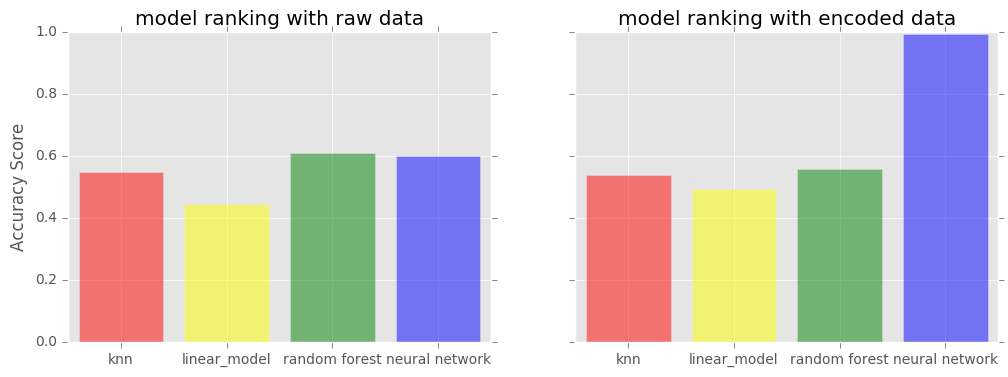

In [39]:
raw_scores = {'linear_model': linear_score, 'knn': knn_score, 'random forest': tree_score, 'neural network':accuracy}
encoded_scores = {'linear_model':linear_score2, 'knn':knn_score2, 'random forest': tree_score2, 'neural network':accuracy2}

color=['red', 'yellow', 'green', 'blue']

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,4))

y = range(len(raw_scores.keys()))
ax1.bar(y, raw_scores.values(), align='center', alpha=0.5, color=color)
ax1.set_ylabel('Accuracy Score')
ax1.set_xticks(y)
ax1.set_xticklabels(raw_scores.keys())
ax1.set_title('model ranking with raw data')

y2 = range(len(encoded_scores.keys()))
ax2.bar(y2, encoded_scores.values(), align='center', alpha=0.5, color=color)
ax2.set_xticks(y2)
ax2.set_xticklabels(encoded_scores.keys())
ax2.set_title('model ranking with encoded data')

plt.show()